<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2D-variables-to-0D" data-toc-modified-id="2D-variables-to-0D-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2D variables to 0D</a></span><ul class="toc-item"><li><span><a href="#plot" data-toc-modified-id="plot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>plot</a></span></li></ul></li><li><span><a href="#3D-to-1D-comparisons" data-toc-modified-id="3D-to-1D-comparisons-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>3D to 1D comparisons</a></span></li></ul></div>

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
run="run_ab"

# 2D variables to 0D

In [15]:
# ds = xr.open_dataset("/home/disk/eos1/bloss/Runs/PIRE/DP-SCREAM/Tests/RCE_SMALL_al/scream_dp_RCE_SMALL_al.eam.h1.2000-01-01-00000.nc")
ds = xr.open_dataset("/home/disk/eos15/smturbev/DPSCREAM_simulations/dpscream_small_3km/{}/scream_dp_RCE_SMALL_3km_{}.eam.h1.2000-01-01-00000.nc".format(run,run[-2:]))
ds = ds.isel(time=slice(-240,-1))
ds

<xarray.Dataset>
Dimensions:        (ncol: 1296, lev: 128, ilev: 129, swband: 14, lwband: 16,
                    P3_input_dim: 16, P3_output_dim: 32, time: 239, nbnd: 2)
Coordinates:
  * lev            (lev) float64 2.58 3.23 3.88 4.597 ... 991.0 994.9 998.5
  * ilev           (ilev) float64 2.255 2.905 3.555 4.205 ... 992.9 997.0 1e+03
  * swband         (swband) float64 2.925e+03 3.625e+03 ... 4.4e+04 1.71e+03
  * lwband         (lwband) float64 130.0 375.0 565.0 ... 2.535e+03 2.965e+03
  * P3_input_dim   (P3_input_dim) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16
  * P3_output_dim  (P3_output_dim) int32 1 2 3 4 5 6 7 ... 26 27 28 29 30 31 32
  * time           (time) object 2000-03-02 02:00:00 ... 2000-03-12 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/74)
    lat            (ncol) float64 ...
    lon            (ncol) float64 ...
    area           (ncol) float64 ...
    hyam           (lev) float64 ...
    hybm           (lev) float64 ...
    P0             float64 ...
    ...             ...
    TMQ            (time, ncol) float32 ...
    TREFHT         (time, ncol) float32 ...
    TS             (time, ncol) float32 ...
    WINDSPD_10M    (time, ncol) float32 ...
    crm_grid_x     (time, ncol) float32 ...
    crm_grid_y     (time, ncol) float32 ...
Attributes: (12/19)
    ne:                30
    np:                4
    title:             EAM History file information
    source:            E3SM Atmosphere Model
    source_id:         044184ecf9
    product:           model-output
    ...                ...
    institution_id:    E3SM-Project
    institution:       LLNL (Lawrence Livermore National Laboratory, Livermor...
    contact:           e3sm-data-support@listserv.llnl.gov
    initial_file:      /glade/u/home/sturbeville/work/E3SM/inputdata/atm/cam/...
    topography_file:   /glade/u/home/sturbeville/work/E3SM/inputdata/atm/cam/...
    time_period_freq:  hour_1

In [16]:
t=0
# rsfc, the net radiative flux at the sfc (SW-LW)
rsfc = ds["FSNS"]-ds["FLNS"]
rsfcc = ds["FSNSC"]-ds["FLNSC"]
# rtoa, the net radiative flux at toa (SW-LW)
rtoa = ds["FSNTOA"]-ds["FLUT"]
rtoac = ds["FSNTOAC"]-ds["FLUTC"]
# rnet = rtoa − rsfc, where negative values indicate net atmospheric radiative cooling
rnet = rtoa - rsfc
rnetc = rtoac - rsfcc
# energy input into ocean
qocn = rsfc-ds["LHFLX"]-ds["SHFLX"]
# olr
olr = ds["FLUT"]
# asr, absorbed sw radiation (i.e., net SW flux at TOA (total incoming - total outgoing))
asr_toa = ds["FSNTOA"]
# lhf, latent heat flux
lhf = ds["LHFLX"]
# shf, sensible heat flux
shf = ds["SHFLX"]
# pw, precipitable water
pw = ds["TMQ"]
# precip, precipitation rate
pr = (ds.PRECL)*1000*3600*24 #m/s --> mm/day ==> m/s * 1000 mm/m * 3600s/1hr * 24hr/day = mm/day
# LWP, liquid water path
lwp = ds["TGCLDLWP"]
# IWP, ice water path
iwp = ds["TGCLDIWP"]
# clwvi_avg, water vapor path
wvp = ds["TGCLDCWP"]
# average tropospheric lapse rate
# fnet, the magnitude of difference between the energy imbalance at the surface and top of atmosphere
# Note that FNet should be zero if energy is conserved and the simulation is equilibrated.
# models with explicit convection are more out of balance (FNet = 5.55 W m−2)
fnet = abs((rtoa[t:].where(rtoa<1e5).mean())-\
           (rsfc[t:].where(rsfc<1e5).mean()+\
            ds["LHFLX"][t:].where(ds["LHFLX"]<1e5).mean().values+\
            ds["SHFLX"][t:].where(ds["LHFLX"]<1e5).mean().values))
print(fnet.shape, fnet.values, (rtoa[t:].where(rtoa<1e5).mean()).values,
           rsfc[t:].where(rsfc<1e5).mean().values,
            ds["LHFLX"][t:].where(ds["LHFLX"]<1e5).mean().values,
            ds["SHFLX"][t:].where(ds["LHFLX"]<1e5).mean().values)


names = ["FNET","RTOA","QOCN","RNET","OLR","ASR_TOA","LHF","SHF","PW","Precip.","LWP","IWP","clwvi_avg","Lapse Rate"]
datameans = [fnet.values, rtoa[t:].where(rtoa<1e5).mean(skipna=True).values, 
        qocn[t:].where(qocn<1e5).mean(skipna=True).values, rnet[t:].where(rnet<1e5).mean(skipna=True).values, 
        olr[t:].where(olr<1e5).mean(skipna=True).values, asr_toa[t:].where(asr_toa<1e5).mean(skipna=True).values, 
        lhf[t:].where(lhf<1e5).mean(skipna=True).values, shf[t:].where(shf<1e5).mean(skipna=True).values, 
        pw[t:].where(pw<1e5).mean(skipna=True).values, pr[t:].where(pr<1e5).mean(skipna=True).values, 
        lwp[t:].where(lwp<1e5).mean(skipna=True).values, iwp[t:].where(iwp<1e5).mean(skipna=True).values, 
        wvp[t:].where(wvp<1e5).mean(skipna=True).values, np.nan]
datastds = [0, rtoa[t:].where(rtoa<1e5).std(skipna=True).values, 
        qocn[t:].where(qocn<1e5).std(skipna=True).values, rnet[t:].where(rnet<1e5).std(skipna=True).values, 
        olr[t:].where(olr<1e5).std(skipna=True).values, asr_toa[t:].where(rnet<1e5).std(skipna=True).values, 
        lhf[t:].where(lhf<1e5).std(skipna=True).values, shf[t:].where(rnet<1e5).std(skipna=True).values, 
        pw[t:].where(pw<1e5).std(skipna=True).values, pr[t:].where(pr<1e5).std(skipna=True).values, 
        lwp[t:].where(lwp<1e5).std(skipna=True).values, iwp[t:].where(rnet<1e5).std(skipna=True).values, 
        wvp[t:].where(wvp<1e5).std(skipna=True).values, np.nan]
data = np.array([datameans,datastds]).T
data.shape

() 167.23685 99.163506 180.70071 79.896194 5.8034277


(14, 2)

In [17]:
olr.min(skipna=True), olr.max(skipna=True), olr.mean(skipna=True)

(<xarray.DataArray 'FLUT' ()>
 array(83.44992828),
 <xarray.DataArray 'FLUT' ()>
 array(280.02612305),
 <xarray.DataArray 'FLUT' ()>
 array(243.63867, dtype=float32))

In [18]:
rcemeans = pd.read_csv("/home/disk/eos15/smturbev/rcemip/stats/0D/Table_A1_RCE_small300.csv", index_col="Model").loc["Mean"].drop(["Unnamed: 0","Unnamed: 1"])
rcestds = pd.read_csv("/home/disk/eos15/smturbev/rcemip/stats/0D/Table_A1_RCE_small300.csv", index_col="Model").loc["STD"].drop(["Unnamed: 0","Unnamed: 1"])
# pd.read_csv("/home/disk/eos15/smturbev/rcemip/stats/0D/Table_A1_RCE_small300.csv", index_col="Model")

In [19]:
rcemeans

F_NET           4.67
R_TOA          98.14
Q_OCN          97.48
R_NET         -84.66
OLR           241.24
ASR_TOA       339.38
LHF            75.96
SHF             9.36
PW              38.7
Precip.          2.9
LWP            0.026
IWP            0.033
clwvi_avg      0.059
Lapse Rate     -7.26
Name: Mean, dtype: object

In [20]:
(rtoa-rsfc).mean()

<xarray.DataArray ()>
array(-81.53719, dtype=float32)

In [21]:
# combine into dataframe
total_array = np.insert(data, 0, rcemeans.values, axis=1)
total_array = np.insert(total_array, 1, rcestds.values, axis=1)
print(total_array.shape)
df = pd.DataFrame(total_array, columns=["RCE_MEAN", "RCE_STD", "SC_MEAN", "SC_STD"], index=names)
df

(14, 4)


,RCE_MEAN,RCE_STD,SC_MEAN,SC_STD
FNET,4.670,3.530,167.236847,0.000000
RTOA,98.140,17.180,99.163506,35.522781
QOCN,97.480,18.130,95.001053,68.760796
RNET,-84.660,13.920,-81.537193,37.167439
OLR,241.240,15.670,243.638672,41.274490
ASR_TOA,339.380,23.980,342.802216,59.439777
LHF,75.960,12.330,79.896194,19.815046
SHF,9.360,4.660,5.803428,5.481206
PW,38.700,5.100,35.256340,1.804457
Precip.,2.900,1.000,2.761468,45.638840


## plot

In [22]:
def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')



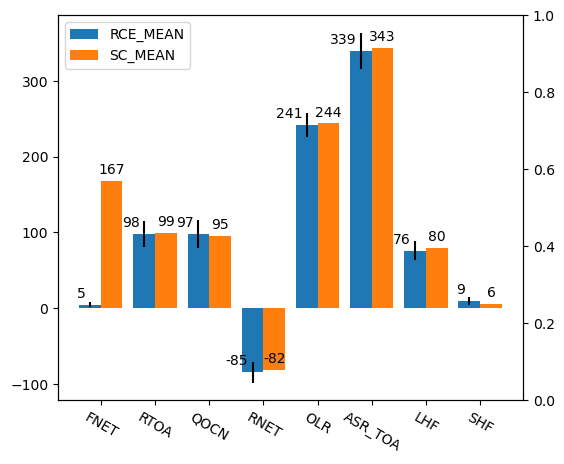

In [24]:
plot_type = "rad" # "water" or "rad"

fig, ax = plt.subplots(1,1, figsize=(6,5))
axt = ax.twinx()
if plot_type=="water":
    var_list=["PW", "Precip.", "LWP", "IWP", "clwvi_avg"]
elif plot_type=="rad":
    var_list=["FNET","RTOA","QOCN","RNET","OLR","ASR_TOA","LHF","SHF"]
for i in range(len(var_list)):
    if i==0:
        labs = ["RCE_MEAN", "SC_MEAN"]
    else:
        labs=[None,None]
    var=var_list[i]
    rcemean = df["RCE_MEAN"][var]
    rcestd = df["RCE_STD"][var]
    if (plot_type=="water") and (i>1):
#         axt.plot([i-0.2,i-0.2], [rcemean-rcestd, rcemean+rcestd], marker="_", color='k')
        rects1 = axt.bar(i-0.2,rcemean, color="C0", width=0.4, label=labs[0], yerr=rcestd)
        rects2 = axt.bar(i+0.2,df["SC_MEAN"][var], color="C1", width=0.4, label=labs[1])
        autolabel(rects1, "left")
        autolabel(rects2, "center")
    else:
#         ax.plot([i-0.2,i-0.2], [rcemean-rcestd, rcemean+rcestd], marker="_", color='k')
        rects1 = ax.bar(i-0.2,rcemean, color="C0", width=0.4, label=labs[0], yerr=rcestd)
        rects2 = ax.bar(i+0.2,df["SC_MEAN"][var], color="C1", width=0.4, label=labs[1])
        autolabel(rects1, "left")
        autolabel(rects2, "center")
ax.set_xticks(np.arange(0,len(var_list)))
ax.set_xticklabels(var_list, rotation=-30)
if plot_type=="water":
    axt.set_yscale("log")
    ax.axvline(2-0.5, color="k", linestyle="dashed")
    ax.legend(loc="center left")
else:
    ax.legend(loc="best")
plt.savefig("plots/rce_comp_0d_{}_{}.png".format(plot_type,run),dpi=140)
plt.show()

# 3D to 1D comparisons 

In [76]:
## test file from Peter Blossey
# sc = xr.open_dataset("/home/disk/eos1/bloss/Runs/PIRE/DP-SCREAM/Tests/RCE_SMALL_al/scream_dp_RCE_SMALL_al.eam.h0.2000-01-01-00000.nc")
## output from dp scream 3km run ab
sc = xr.open_dataset("/home/disk/eos15/smturbev/DPSCREAM_simulations/dpscream_small_3km/{}/scream_dp_RCE_SMALL_3km_{}.eam.h0.2000-01-01-00000.nc".format(run,run[-2:]))
# sc = sc.isel(time=slice(-10,-1))
sce = sc.isel(time=-1)# last time step # last ten days: (time=slice(-10,-1)).mean(dim=["time"]) 
sci = sc.isel(time=0) # first time step

## input file
iop = xr.open_dataset("../run_scripts/Cheyenne/RCE_iopfile_4scam.nc")
# sci = xr.open_dataset("../run_scripts/Cheyenne/cami_mam3_Linoz_ne30np4_SCREAM_L128_c160214.nc")
iop = iop.isel(time=0).sel(lat=0).sel(lon=0)
print(sc["T"].shape, sce["T"].shape, sci["T"].shape)

(71, 128, 1296) (128, 1296) (128, 1296)


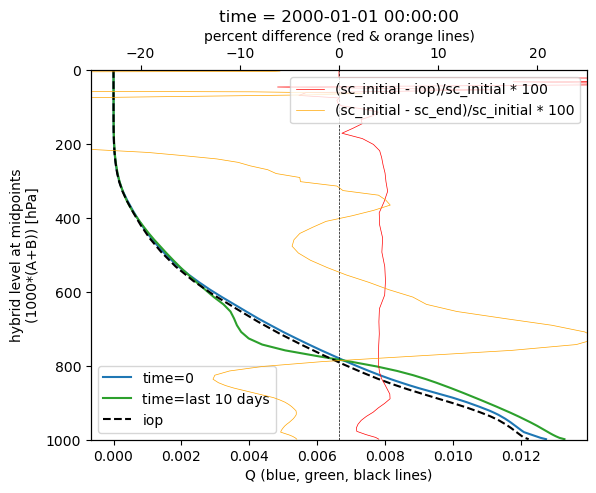

saved as plots/initial_condition_iop_comp_Q_last10days.png


In [77]:
# plot temperature/wv profiles
vsc="Q"
vio="q"
fig, ax = plt.subplots(1,1)
sci_mean = sci[vsc].mean(dim=["ncol"])
sce_mean = sce[vsc].mean(dim=["ncol"])
#time=0
sci_mean.plot(y="lev", label="time=0", ax=ax, color="C0")
#time=-1 last timestep
sce_mean.plot(y="lev", label="time={}".format(len(sc.time)), ax=ax, color="C2")
#iop
ax.plot(iop[vio], iop.lev/100, linestyle="dashed", label="iop", 
        color="k")

axt = ax.twiny()
#difference in percent between sc initial timestep and iop file
sci_interp = sci_mean.interp(lev=(iop.lev.values/100), method="linear")
diff = (sci_interp-iop[vio].values)
diff_mean = diff/sci_interp*100
# diff.plot(y="lev", label="diff", 
#           color="k", ax=ax, alpha=0.5, linewidth=0.5, marker=".")
diff_mean.plot(y="lev", label="(sc_initial - iop)/sc_initial * 100", color="red", 
               ax=axt,linewidth=0.5)
#difference in percent between sc initial and end timesteps
diff = (sci_mean-sce_mean)
diff_mean = diff/sci_mean*100
# diff.plot(y="lev", label="diff", 
#           color="k", ax=ax, alpha=0.5, linewidth=0.5, marker=".")
diff_mean.plot(y="lev", label="(sc_initial - sc_end)/sc_initial * 100", color="orange", 
               ax=axt, linewidth=0.5)

# axis stuff
ax.legend(loc="lower left")
axt.legend(loc="upper right")
axt.set_xlabel("percent difference (red & orange lines)")
ax.set_xlabel(vsc+" (blue, green, black lines)")
ax.set_ylim([1000,0])
axt.set_xlim([-25,25])
axt.axvline(x=0,color="k", linestyle="dashed", linewidth=0.5)
# ax.set_xscale("log")
# axt.set_xscale("log")
# axt.set_xlim(1e-12,1e-1)
# ax.set_xlim(1e-12,1e-1)
# axt.set_xlim([-2,2])
# ax.set_xlim([220,250])
# ax.set_yscale("log")
# axt.set_ylim([1000,1])
# axt.tick_params(axis="x", color="red", labelcolor="red")
# axt.tick_params(color="C1",  labelcolor="C1")
save_name="plots/initial_condition_iop_comp_{}.png".format(vsc)
plt.savefig(save_name)
plt.show()
print("saved as",save_name)

28 models
0 ta_avg T
(128, 1296) (72,)


AxisError: axis 1 is out of bounds for array of dimension 1

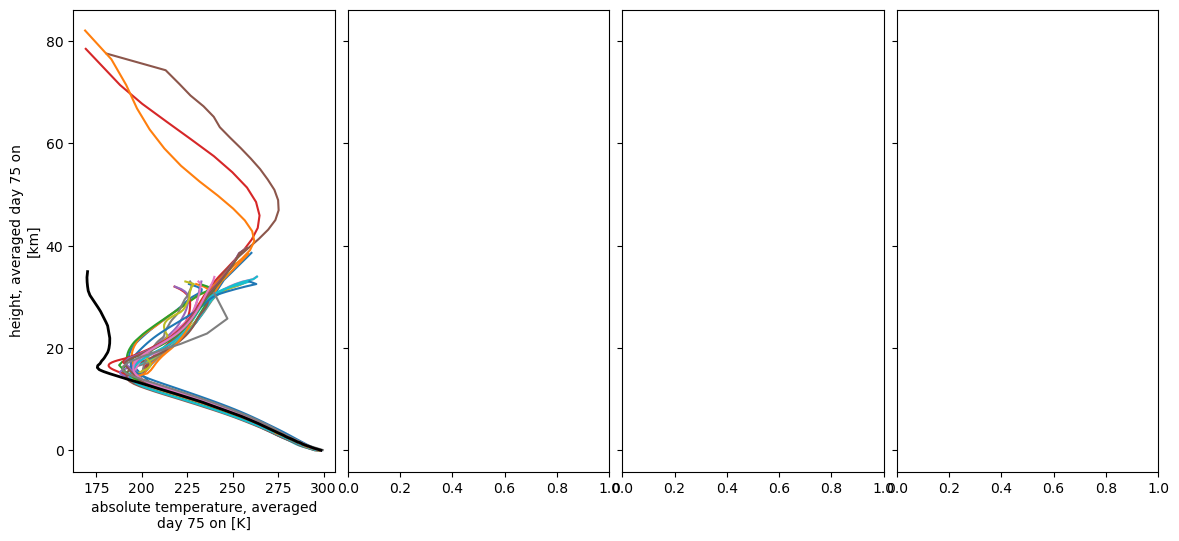

In [44]:
# get list of small rce models
var_list = ["ta_avg", "hus_avg", "tw_avg", "cfv0_avg"]
varsc = ["T", "Q", "CLDICE", "TOT_CLOUD_FRAC"]
varsci = ["T", "Q", "CLDICE", None]
utls=False
models = open("/home/disk/eos15/smturbev/rcemip/stats/1D/0-models-list.txt","r").read().split("-----")[2].split("\n")[2:-2]
print(len(models),"models")
z = sc.Z3.where(sc.Z3<1e10).mean(dim=["ncol"]).values/1000

# plot rce small300 models and dp-scream
fig, ax = plt.subplots(1,len(var_list),figsize=(3.5*len(var_list),6), sharey=True)
fig.subplots_adjust(hspace=0, wspace=0.05)
for i, v in enumerate(var_list):
    vs = varsc[i]
    vsi = varsci[i]
    print(i, v, vs)
    # rcemip
    for j in range(len(models)):
        try:
            ds = xr.open_dataset("/home/disk/eos15/smturbev/rcemip/stats/1D/RCE_small/"+\
                                 models[j]+"_RCE_small300_cfv0-profiles.nc")[v]
        except FileNotFoundError: 
            continue
        ds.plot(y="zg_avg", ax=ax[i], label=models[i]) #, marker="."
    # scream
    if vs=="CLDICE":
        var = sc[vs].where(sc[vs]<1e10) + sc["CLDLIQ"].where(sc[vs]<1e10)
        if vsi is not None:
            vari = sci[vsi].where(sci[vsi]<1e10) + sci["CLDLIQ"].where(sci[vsi]<1e10)
        var.attrs["units"]=sc[vs].units
    elif vs=="Q":
        var = (sc[vs].where(sc[vs]<1e10)*1000)
        if vsi is not None:
            vari = (sci[vsi].where(sci[vsi]<1e10)*1000)
        var.attrs["units"]='g/kg'
    else:
        var = sc[vs].where(sc[vs]<1e10)
        if vsi is not None:
            vari = sci[vsi].where(sci[vsi]<1e10)
        var.attrs["units"]=sc[vs].units
    print(var.shape, vari.shape)
    ax[i].plot(np.nanmean(var, axis=(1)), z, 
            color="k", linewidth=2, label="SCREAM") #, marker="."
    if vsi is not None:
        ax[i].plot(np.nanmean(vari, axis=(1)), z, 
            color="k", linewidth=2, linestyle="dashed", label="SCREAM iop")
    if vs == "CLDICE":
#         ax[i].set_xscale("log")
#         ax[i].set_xlim([1e-9,1e-4])
        ax[i].set_ylabel(None)
    elif vs == "Q":
        ax[i].set_xscale("log")
        ax[i].set_ylabel(None)
    ax[i].grid(True)
    ax[i].set_xlabel(v+" ["+var.units+"]")
ax[-1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[-1].set_ylabel(None)
ax[0].set_ylabel("Height [km]")
if utls:
    ax[0].set_xlim([170,225])
    ax[1].set_xlim([1e-5,1e-1])
    ax[0].set_ylim([12,20])
    save_name = "plots/rce_comp_1d_utls_{}_{}.png".format(var_list[-1],run)
    print("saved as", save_name)
    plt.savefig(save_name, bbox_inches="tight", pad_inches=1)
else:
    ax[0].set_xlim([170,310])
    ax[1].set_xlim([1e-5,1e2])
    ax[0].set_ylim([0,20])
    save_name = "plots/rce_comp_1d_{}_{}.png".format(var_list[-1],run)
    print("saved as", save_name)
    plt.savefig(save_name, bbox_inches="tight", pad_inches=1)

plt.show()
    